# Visualizing participant networks

This notebook is designed to help interpretation of the roles of participants in a network. If the role cannot be directly be derived from the structure of the network but depends on the quality of actual interactions, we need to be able to extract information on the interactions and agency levels invested in these interactions.

This notebook, therefore, contains a number of diverse functions that help visualizing and sorting interactions in order to assist interpreting the roles of the participants.

In [2]:
import collections
import pandas as pd
import numpy as np
import networkx as nx
import forceatlas2
import random

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

Network data

In [1]:
data = pd.read_excel('Lev17-26.edges.Static.xlsx')

NameError: name 'pd' is not defined

## Participants and clusters

In [130]:
G = nx.MultiDiGraph()
for n, row in data.iterrows():
    G.add_edge(row.Source, row.Target, value=row.Label)

#### Who has most relationships?

In [131]:
rel_dict = {}

for n in G.nodes():
    rel_dict[n] = len(nx.ego_graph(G, n, undirected=True))
    
pd.DataFrame([rel_dict]).T.sort_values(by=0, ascending=False)

,0
2msg,28
Israelites,27
an_Israelite,22
sojourner,20
YHWH,16
Aaron,14
Aaron's_sons,10
brother,8
Moses,7
father,6


In [174]:
a = nx.ego_graph(G1, 'sojourner', undirected=True)
b = nx.ego_graph(G1, 'Israelites', undirected=True)
for n in a.nodes():
    if n not in b.nodes():
        print(n)

#### Which clusters of participants do the relations belong to?

In [223]:
clusters = pd.read_csv('node2vec/multiple_directed_valued_clusters.csv', index_col=0)
clusters.sort_values(by='cluster', ascending=False)

,node,cluster
0,Aaron's_sons,2
3,Israelites,2
5,an_Israelite,2
6,Aaron,2
8,sojourner,2
9,2msg,2
1,YHWH,2
13,group_of_people,1
43,daughter,1
35,fellow's_wife,1


We can get the cluster to which each participant belong and thus see the membership of those participant to which an ego is connected:

In [134]:
def getGroups(G, ego, clusters=clusters):
    
    cluster_dict = {}
    
    ego_graph = nx.ego_graph(G, ego, undirected=True)
    for r in list(ego_graph.nodes()):
        cluster_dict[r] = clusters[clusters.index == r].cluster.item()
    
    df = pd.DataFrame([cluster_dict]).T.sort_values(by=0, ascending=False)
    df = df[df.index != ego]
    return df

getGroups(G, 'Israelites')

,0
an_Israelite,2
Aaron,2
YHWH,2
sojourner,2
Aaron's_sons,1
brother,1
remnants,1
foreign_nations,1
sister,1
blasphemer,1


Which participant has connections to most core participants?

In [135]:
for actor in list(G.nodes()):
    groups = getGroups(G, actor)
    
    print(actor, len(groups[groups[0] == 2]))
    

Aaron's_sons 4
YHWH 5
Moses 3
Israelites 4
kinsmen 4
an_Israelite 2
Aaron 2
blasphemer 2
sojourner 3
2msg 2
corpse 2
foreign_nations 2
remnants 2
group_of_people 3
2mpl 1
lay-person 2
witnesses 0
father 5
mother 5
virgin 1
widowed/expelled/defiled_woman 1
offspring 4
human_being 3
slave 1
brother 4
handmaid 2
sons_of_sojourners 1
children 1
no-one 1
idols 4
father's_wife 4
sister 4
aunt 2
aunt-in-law 4
daughter-in-law 4
fellow's_wife 4
granddaughter 2
woman_and_her_mother 3
man/woman 1
male 3
woman_in_menstruation 2
purchaser 1
relative 0
daughter 1
deaf 1
blind 1
poor 1
rich 1
elderly 1
woman 1
son_of_brother 1
woman_and_her_daughter 1
granddaughter_of_woman 1
sister_of_woman 1
brother's_brother 0
clan 0
brother's_uncle 0
man 0
husband 0


## Draw egonetworks

In [136]:
def draw_ego(graph, actor, size=(10,10), data=data):    
    plt.figure(figsize = size)

    ego = nx.ego_graph(graph, actor, undirected=True)
    
    #Print edge labels
    edge_labels = collections.defaultdict(set)
    
    for e in ego.edges(data='value'):
        edge_labels[(e[0],e[1])].add(e[2])
        
    for e in edge_labels:
        print('''{0:30}{1:30}'''.format(' -> '.join(e), ', '.join(edge_labels[e])))

    pos=nx.spring_layout(ego)
    nx.draw(
        ego,
        pos=pos,
        with_labels=True,
        edge_color='grey',
        node_color='lightblue',
        node_size=[n[1]*10 for n in ego.degree()],
        font_size=14
        )
    nx.draw_networkx_nodes(ego, pos=pos, nodelist=[actor], node_color='salmon', node_size=ego.degree(actor)*10)
    plt.margins(x=0.1, y=0.1)
    plt.show()

sojourner -> YHWH             defile, approach, be slight, make, bore
sojourner -> woman_in_menstruationuncover, lie down             
YHWH -> sojourner             give, cut, put                
YHWH -> YHWH                  give                          
YHWH -> an_Israelite          perish, give, cut, put        
YHWH -> Aaron                 go out, cut, be holy          
YHWH -> kinsmen               perish, cut                   
an_Israelite -> YHWH          defile, approach, be slight, make, bore
an_Israelite -> woman_in_menstruationuncover, lie down             
Aaron -> YHWH                 defile, approach, arrange, slaughter, give
Aaron -> kinsmen              defile                        
kinsmen -> an_Israelite       cut                           
kinsmen -> sojourner          cut                           
kinsmen -> woman_in_menstruationcut                           


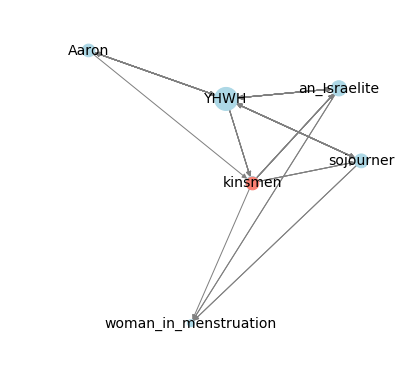

In [224]:
draw_ego(G, "kinsmen", size=(5,5))

## Node removal and cohesion

We can measure the structural importance of a participant by performing a 'removal test'. A removal test computes the resulting density of the network when removing a participant. The participant which causes the largest loss of network density by its removal is the structurally most important participant. 

In [138]:
def removalTest(ego):
    
    density_dict = {}
    for n in ego.nodes():
        remove = [l for l in ego.nodes() if l!=n]
        new_graph = ego.subgraph(remove)
        density_dict[n] = nx.density(new_graph)

    removal_df = pd.DataFrame([density_dict]).T
    removal_df.columns=['density']
    return removal_df

#removalTest(G)

In [4]:
def plotDF(graph, column, size=(15,7), actor=str, typ='ego', plot_graph=False, line=True):
    '''
    It is possible to make a removal test for an ego-network (type='ego') and the entire graph ('graph')
    '''
    
    if typ == 'ego':
        ego = nx.ego_graph(graph, actor, undirected=True)
        df = removalTest(ego)
        df = df.sort_values(by=column, ascending=False)
        ego_index = df.index.get_loc(actor)
        density = nx.density(ego)
        print(f'Original density of egonetwork: {density}')
 
    elif typ == 'graph':
        df = removalTest(graph)
        df = df.sort_values(by=column, ascending=False).tail(15)
        density = nx.density(graph)
        print(f'Original density of network: {density}')
    
    fig, ax = plt.subplots(figsize=size)
    plot = plt.bar(df.index, df[column])
    if actor:
        actor_index = df.index.get_loc(actor)
        plot[actor_index].set_color('#ED5955')
    plt.ylabel("density", size=14)
    plt.xticks(size=11, rotation=45, ha='right')
    plt.yticks(size=12)
    
    if line:
        plt.axhline(y=density, linestyle='dashed', color='grey')
    
    # draw graph in inset
    if plot_graph:
        plt.axes([0.4, 0.4, 0.5, 0.5])
        nodes = list(df.index)

        subgraph = graph.subgraph(nodes)
        pos = nx.spring_layout(subgraph)
        nx.draw(
            subgraph,
            pos=pos,
            with_labels=True,
            edge_color='grey',
            node_color='lightblue',
            font_size=14
            )
        nx.draw_networkx_nodes(subgraph, pos=pos, nodelist=[ego], node_color='salmon')

        plt.axis('off')

plotDF(G, actor="YHWH", column='density', typ='graph', line=True)

NameError: name 'removalTest' is not defined

### Agency and roles

By importing the participant data of Leviticus 17-26 we get additional means to show the participants and their networks.

In [23]:
from tf.app import use
A = use('bhsa', hoist=globals(), mod='ch-jensen/participants/actor/tf')

Using TF-app in C:\Users\Ejer/text-fabric-data/annotation/app-bhsa/code:
	rv2.2.0=#b3757bf25f7b165f75cd02fc3c8f501f84b97935 offline under ~/text-fabric-data (local release)
Using data in C:\Users\Ejer/text-fabric-data/etcbc/bhsa/tf/c:
	rv1.6=#bac4a9f5a2bbdede96ba6caea45e762fe88f88c5 offline under ~/text-fabric-data (local release)
Using data in C:\Users\Ejer/text-fabric-data/etcbc/phono/tf/c:
	r1.2=#1ac68e976ee4a7f23eb6bb4c6f401a033d0ec169 offline under ~/text-fabric-data (local release)
Using data in C:\Users\Ejer/text-fabric-data/etcbc/parallels/tf/c:
	r1.2=#395dfe2cb69c261862fab9f0289e594a52121d5c offline under ~/text-fabric-data (local release)
Using data in C:\Users\Ejer/text-fabric-data/ch-jensen/participants/actor/tf/c:
	r1.8=#9671910a329c069cfd3d366526ea816de57666dc offline under ~/text-fabric-data (local release)
   |     0.00s Dataset without structure sections in otext:no structure functions in the T-API


#### Roles

We can calculate the mean agency invested by a participant in each of its relationships. This provides a simple visualization of its role in all its relationships.

Mean agency of father: -1.0


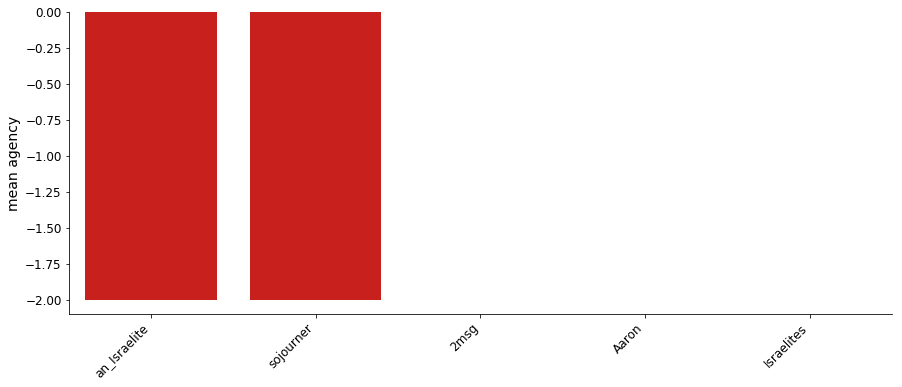

In [276]:
def Roles(actor, data=data, width=1.5):
    
    agency = []
    df = data[(data.Source == actor) | (data.Target == actor)]
    
    for n, row in df.iterrows():
        if row.Source == actor:
            agency.append((row.Target,row.Source_agency))
        else:
            agency.append((row.Source,row.Target_agency))

    new_df = pd.DataFrame(agency)
    new_df.columns = ['participant', 'agency']

    mean = new_df.groupby('participant')['agency'].mean().sort_values()
    mean_df = pd.DataFrame(mean)
    print(f'Mean agency of {actor}: {round(new_df.agency.mean(), 3)}')
    
    custom_palette = {}
    for n, row in mean_df.iterrows():
        if row.agency < -1:
            custom_palette[n] = "#E50600"
        elif row.agency >= -1 and row.agency < 0:
            custom_palette[n] = "#ED5955"
        elif row.agency >= 0 and row.agency < 1:
            custom_palette[n] = "#D2E3F0" 
        elif row.agency >= 1 and row.agency < 2:
            custom_palette[n] = "#A5C8E1"
        elif row.agency >= 2 and row.agency < 3:
            custom_palette[n] = "#78ADD2"
        elif row.agency >= 3 and row.agency < 4:
            custom_palette[n] = "#4B92C3"
        elif row.agency >= 4:
            custom_palette[n] = "#1f77b4"
            
    sns.catplot(x='participant', y='agency', kind='bar', order=mean.index, data=new_df, palette=custom_palette,
               height=5, aspect=width)
    plt.ylabel('mean agency', size=14)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.xticks(size=12, rotation=45, ha='right')
    plt.show()

Roles('father', width=2.5)

#### Show interactions

We can also show can also show specific interactions between two participants:

In [211]:
def show(Actor, Undergoer, verb=list(), data=data):
    
    clauses = []
    
    if verb:
        clauses = data[(data.Source == Actor) & (data.Target == Undergoer) & (data.Label.isin(verb))].Clause
    else:
        clauses = data[(data.Source == Actor) & (data.Target == Undergoer)].Clause
    
    if clauses.any():
        
        #Write clause references
        clause_list = list(set(clauses))
        clause_list.sort()
        
        ref_string = '''{} {}:{}'''.format(*T.sectionFromNode(clause_list[0]))
        for cl in clause_list[1:]:
            bo, ch, ve = T.sectionFromNode(cl)
            
            prec_cl = clause_list.index(cl)-1
            prec_bo, prec_ch, prec_ve = T.sectionFromNode(clause_list[prec_cl])
            if ch == prec_ch and ve == prec_ve:
                if '×' in ref_string[-3]:
                    indices = (ref_string.rindex('×'), ref_string.rindex(')'))
                    existing_value = ref_string[indices[0]+1:indices[1]]
                    new_value = str(int(existing_value)+1)
                    ref_string = ref_string[:indices[0]+1] + new_value + ref_string[indices[0]+len(new_value)+1:]
                else:
                    ref_string += f' (×2)'
            elif ch == prec_ch:
                ref_string += f', {ve}'
            else:
                ref_string += f'; {ch}:{ve}'
                    
        print(f'{ref_string}.')
        
        #Display clauses
        for cl in clause_list:
            A.pretty(cl)
            
    else:
        return "No relevant clauses to return"

In [281]:
show("Aaron","father")

Leviticus 21:11.


In [257]:
show("sojourner","brother")

Leviticus 24:19; 25:47 (×2), 53.


### Case-study: The women

We can make specific casestudies of particular participants by collapsing the participants into group. In this case, we collapse all women of the network into one participants in order to see more general trends.

In [258]:
def contractNodes(G, new_label, nodes_to_contract):
    
    for n in nodes_to_contract[1:]: #Contract nodes with the first node of the list
        G = nx.contracted_nodes(G, nodes_to_contract[0], n)
        
    G = nx.relabel_nodes(G, {nodes_to_contract[0]: new_label}, copy=True)
    
    return G

In [259]:
contract_women = ['mother','virgin','widowed/expelled/defiled_woman', 'handmaid',"father's_wife",'aunt', 'aunt-in-law',
                  'daughter-in-law', 'granddaughter','woman_and_her_mother','man/woman', 'woman_in_menstruation','relative',
                  'woman','woman_and_her_daughter','granddaughter_of_woman','sister_of_woman','sister',"fellow's_wife",
                  'daughter']

G_women = contractNodes(G, 'women', contract_women)

data_women = data.replace(contract_women, 'women')

sojourner -> women            take, uncover, be slight, lie down, see, commit adultery
Aaron's_sons -> an_Israelite  cover                         
Aaron's_sons -> Israelites    lift                          
Aaron's_sons -> women         be unclean, take              
an_Israelite -> women         take, uncover, be slight, lie down, see, commit adultery
women -> an_Israelite         see                           
women -> sojourner            see                           
women -> 2msg                 be unclean                    
women -> Aaron's_sons         defile                        
Aaron -> women                be unclean, take              
Aaron -> kinsmen              defile                        
Aaron -> Israelites           lift                          
Israelites -> Aaron's_sons    come                          
Israelites -> an_Israelite    stone, die, burn, hide        
Israelites -> sojourner       dwell, stone, die, hide, oppress, burn
Israelites -> women      

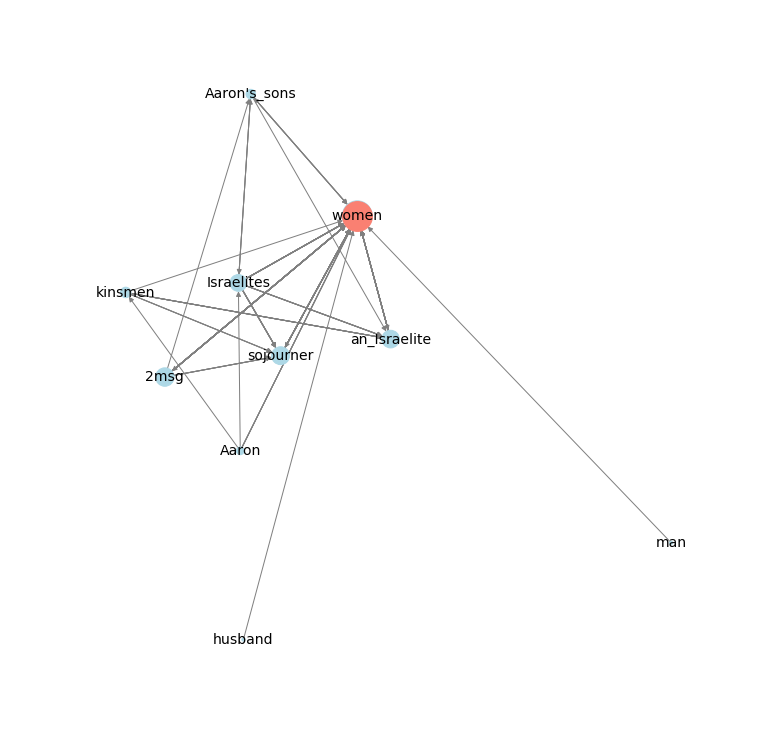

In [260]:
draw_ego(G_women, 'women')

Mean agency of women: -1.022


C:\Users\Ejer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


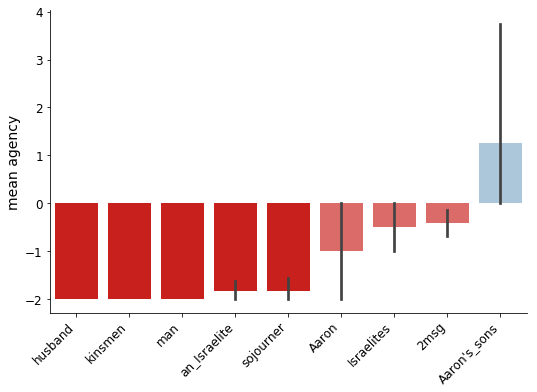

In [261]:
Roles('women', data_women)

In [262]:
show('women',"kinsmen", data=data_women)

'No relevant clauses to return'

In [275]:
show("2msg",'women', data=data_women)

Leviticus 18:7 (×2), 8, 9, 10, 11, 12, 13, 14 (×2), 15 (×2), 16, 17 (×3), 18 (×2), 19 (×2), 20; 19:29 (×2); 20:16, 19.


### Case-study: The poor, the blind, the deaf, and the elderly

In [282]:
contract_marg = ['poor','deaf','blind','elderly']

G_marginalized = contractNodes(G, 'marginalized', contract_marg)

data_marginalized = data.replace(contract_marg, 'marginalized')

In [283]:
Roles('2ms')

ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

In [285]:
show('2ms','elderly')

'No relevant clauses to return'

In [286]:
show('2ms','marginalized', data=data_marginalized)

'No relevant clauses to return'

### Case-study: The priests

In [3]:
G = nx.MultiDiGraph()
for n, row in data.iterrows():
    G.add_edge(row.Source, row.Target, value=row.Label)

NameError: name 'data' is not defined

In [199]:
G_priests = nx.contracted_nodes(G, "Aaron's_sons", "Aaron")
G_priests = nx.relabel_nodes(G_priests, {"Aaron's_sons":'priests'}, copy=True)

In [200]:
data_priests = data.replace(['Aaron',"Aaron's_sons"], 'priests')

Original density of egonetwork: 0.8300653594771242


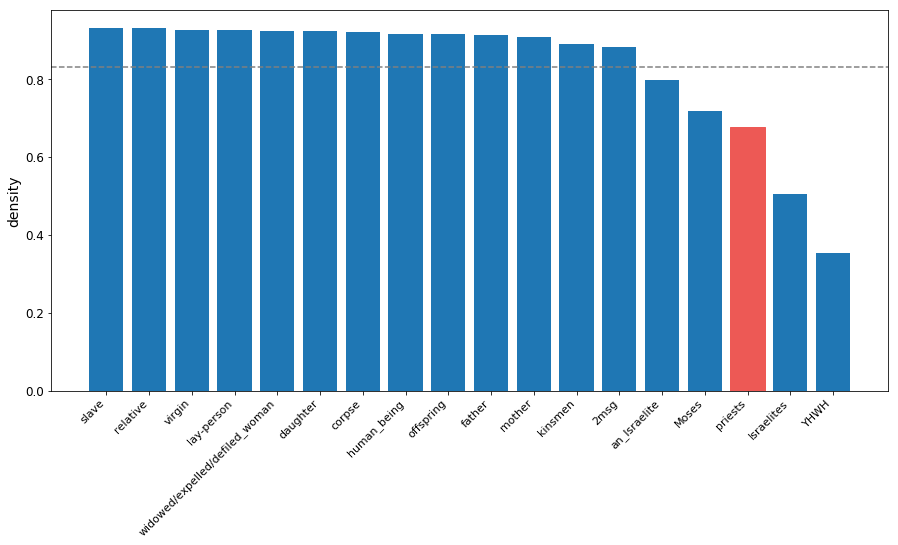

In [201]:
plotDF(G_priests, actor="priests", column='density', typ='ego', line=True)

Mean agency of priests: 0.643


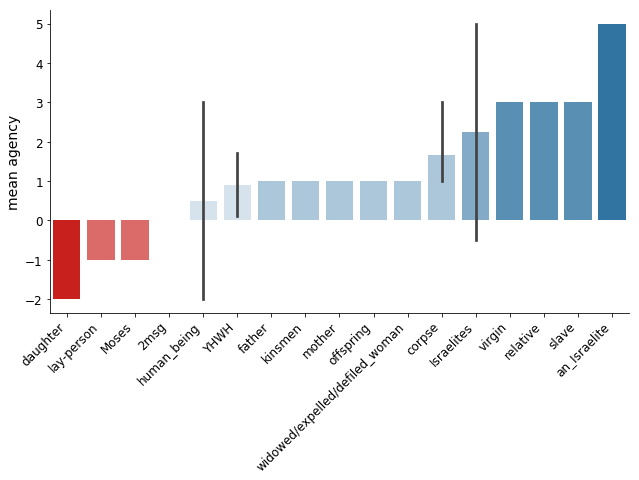

In [203]:
Roles('priests',data_priests, width=1.8)

In [215]:
show('lay-person', 'priests', data=data_priests)

Leviticus 22:14.


In [218]:
show('priests', 'YHWH', data=data_priests)

Leviticus 21:6; 22:2, 22 (×2), 24, 29, 32; 23:11, 20; 24:3, 8.


### Case-study: The sojourner

The sojourner is a curious participant in the network. On the hand, Leviticus 17-26 gives the impression that the sojourner is generally a person on the margins of society. However, in the network, he is situated safely at the core of the network. The network may be misleading because the native Israelites are distinguished as the collective group ("Israelites"), an individual Israelite addressee ("2ms") and an individual, third-person Israelite ("an_Israelite"). Of course, many other participants (e.g. the mother and the father) also belong to the Israelites as an ethnic category. In the text, however, they are not so much distinguished in terms of ethnicitiy as in terms of social role. Therefore, these other roles will be retained. The first three, however, will be merged into a single role in order to explore the role of the sojourner in contrast to Israelites:

In [167]:
G = nx.MultiDiGraph()
for n, row in data.iterrows():
    G.add_edge(row.Source, row.Target, value=row.Label)

In [168]:
G1 = nx.contracted_nodes(G, "Israelites", "2msg")
G1 = nx.contracted_nodes(G1, "Israelites", "an_Israelite")

Aaron's_sons -> YHWH          defile, approach, slaughter, swing, give
Aaron's_sons -> Israelites    lift, cover                   
YHWH -> Moses                 say, speak, command           
YHWH -> kinsmen               perish, cut                   
YHWH -> Israelites            be fertile, send, be empty, command, arise, perish, be holy, separate, give, come, sit, turn, break, strike, be many, go out, say, make, cut, add, scatter, put, admonish, walk, miss
YHWH -> YHWH                  give                          
YHWH -> foreign_nations       scatter, separate             
YHWH -> remnants              come, go out, be complete, break, walk
YHWH -> sojourner             give, cut, put                
YHWH -> group_of_people       cut                           
YHWH -> Aaron                 go out, cut, be holy          
YHWH -> Aaron's_sons          be holy, go out, cut          
Moses -> Israelites           speak, say, command           
Moses -> Aaron's_sons         speak, s

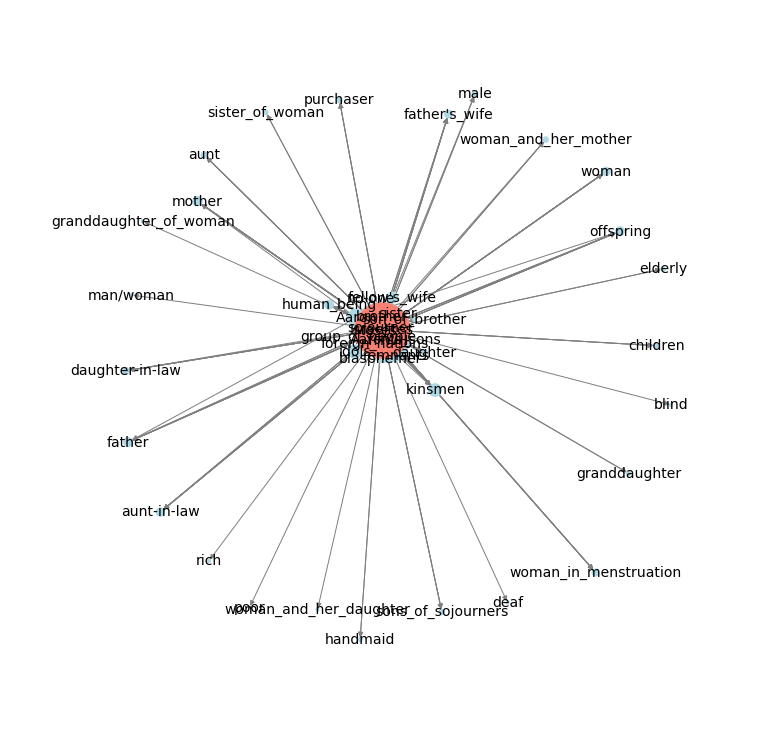

In [169]:
draw_ego(G1, "Israelites")

We want to contrast the sojourner and the Israelites. First, we query whether the sojourner has connections which the Israelites do not have:

In [170]:
def getEdgeLabels(graph, ego):
    
    ego_graph = nx.ego_graph(graph, ego, undirected=True)

    #get edge labels
    edge_labels = collections.defaultdict(set)
    for e in ego_graph.edges(data='value'):
        edge_labels[(e[0],e[1])].add(e[2])

    return edge_labels

def contrastConnections(graph, ego, alter):
    
    edge_labels = getEdgeLabels(graph, ego)

    differences = []
    for e in edge_labels:
        if e[0] == alter and (ego,e[1]) not in edge_labels:
            differences.append(e)
        elif e[0] == ego and (alter,e[1]) not in edge_labels:
            differences.append(e)
        elif e[1] == alter and (e[0],ego) not in edge_labels:
            differences.append(e)
        elif e[1] == ego and (e[0],alter) not in edge_labels:
            differences.append(e)

    print(f'Different connections of {ego} and {alter}:')
    for e in differences:
        print('''  {}'''.format(' -> '.join(e)))
        
contrastConnections(G1, ego='sojourner', alter='Israelites')

Different connections of sojourner and Israelites:
  fellow's_wife -> Israelites
  idols -> Israelites
  Israelites -> sojourner
  Israelites -> Israelites


Next, we want to explore whether the common relationships of the sojourner and the Israelies are different in terms of content (that is, the verb):

In [171]:
def contrastContent(graph, ego, alter):
    
    edge_labels = getEdgeLabels(graph, ego)

    verb_differences = collections.defaultdict(set)
    for e in edge_labels:
        if e[0] == alter and (ego,e[1]) in edge_labels:
            verb_differences[e[1]].update(edge_labels[e].symmetric_difference(edge_labels[(ego, e[1])]))
        elif e[0] == ego and (alter,e[1]) in edge_labels:
            verb_differences[e[1]].update(edge_labels[e].symmetric_difference(edge_labels[(alter,e[1])]))
        elif e[1] == alter and (e[0],ego) in edge_labels:
            verb_differences[e[0]].update(edge_labels[e].symmetric_difference(edge_labels[(e[0],ego)]))
        elif e[1] == ego and (e[0],alter) in edge_labels:
            verb_differences[e[0]].update(edge_labels[e].symmetric_difference(edge_labels[(e[0], alter)]))
            
    return verb_differences
        
contrastContent(G1, 'sojourner', 'Israelites')

defaultdict(set,
            {'sister': {'approach'},
             'YHWH': {'abhor',
              'add',
              'admonish',
              'arise',
              'be empty',
              'be fertile',
              'be high',
              'be holy',
              'be many',
              'break',
              'come',
              'command',
              'fear',
              'give',
              'go out',
              'hear',
              'make',
              'miss',
              'perish',
              'rejoice',
              'say',
              'scatter',
              'send',
              'separate',
              'sit',
              'slaughter',
              'strike',
              'swear',
              'turn',
              'walk'},
             'brother': {'account',
              'be alive',
              'be angry',
              'be strong',
              'buy',
              'go out',
              'hate',
              'judge',
              'lift',
  

Original density of egonetwork: 0.8216374269005848


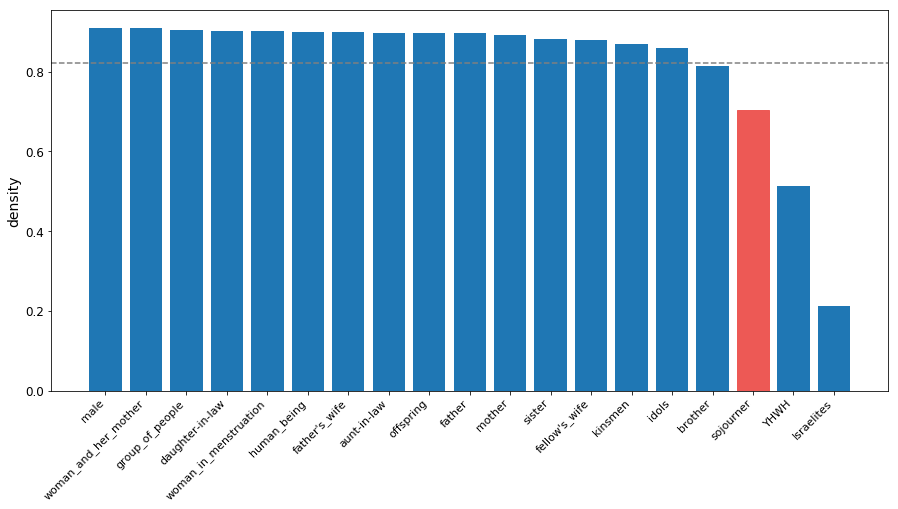

In [172]:
plotDF(G1, column="density", actor="sojourner", plot_graph=False)

#### Agency comparison

We want to compare the average ingoing and outgoing agencies for the sojourner and the Israelites to see if there is marked difference. 

In [183]:
df_Israelites = data.replace(['2msg','an_Israelite'], 'Israelites')
df_Israelites = df_Israelites.replace(['mother','virgin','widowed/expelled/defiled_woman','handmaid',"father's_wife",
                                       'sister','aunt','aunt-in-law','daughter-in-law', "fellow's_wife", 'granddaughter',
                                       'woman_and_her_mother','man/woman','woman_in_menstruation','daughter','woman',
                                       'woman_and_her_daughter','granddaughter_of_woman', 'sister_of_woman'], 'women')

df_Israelites.head()

,Source,Source_label,Source_agency,Target,Target_label,Target_agency,Label,Weight,Type,Clause
0,49,Aaron's_sons,5,43,YHWH,0,swing,25,Directed,440323
1,43,YHWH,5,39,Moses,-1,speak,36,Directed,440335
2,53,Israelites,5,43,YHWH,-1,approach,36,Directed,440341
3,43,YHWH,5,39,Moses,-1,speak,36,Directed,440342
4,53,Israelites,5,43,YHWH,-1,approach,36,Directed,440347


In [184]:
participants = ['sojourner','Israelites','brother','women']

outgoing = df_Israelites[df_Israelites.Source.isin(participants)]
ingoing = df_Israelites[df_Israelites.Target.isin(participants)]

In [185]:
df = pd.melt(df_Israelites, value_vars=['Source','Target'], id_vars=['Weight'])
df.columns = ['agency','direction','participant']
df = df.replace('Source', 'outgoing')
df = df.replace('Target', 'ingoing')
df.head()

,agency,direction,participant
0,25,outgoing,Aaron's_sons
1,36,outgoing,YHWH
2,36,outgoing,Israelites
3,36,outgoing,YHWH
4,36,outgoing,Israelites


In [186]:
df1 = df[df.participant.isin(participants)]

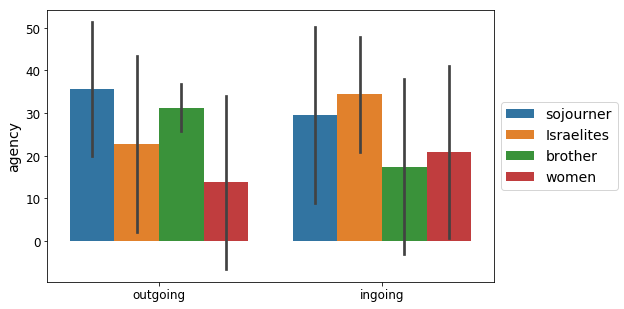

In [187]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df1.direction, y=df1.agency,data=df1, hue=df1.participant, ci="sd", hue_order = participants)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('')
plt.ylabel('agency', size=14)

plt.show()

Mean agency of sojourner: 1.924


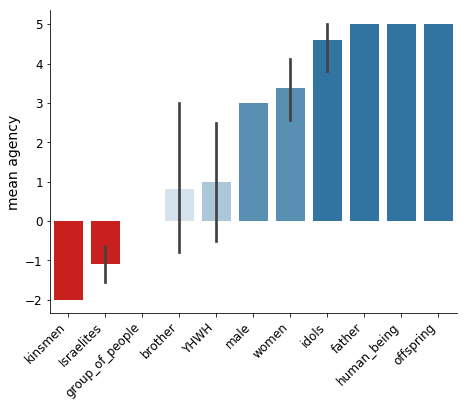

In [192]:
Roles('sojourner', df_Israelites, width=1.3)

In [191]:
show('Israelites',"sojourner", data=df_Israelites)

Leviticus 18:26; 19:10, 33 (×2), 34; 20:2, 4 (×2), 14; 23:22; 24:16.


In [194]:
show('Israelites','YHWH', data=df_Israelites)

Leviticus 17:5, 9; 18:21; 19:5, 12 (×2), 14, 32; 20:3; 22:2, 3, 15, 18, 22 (×2), 24, 29, 32 (×2); 23:8, 16, 25, 27, 36 (×2), 37, 38, 40; 24:15, 16 (×2); 25:17, 36, 43; 26:11, 14, 18, 21 (×2), 23 (×2), 27 (×2), 30.
